In [37]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns

# Clustering
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn_extra.cluster import KMedoids

#Scaling
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import silhouette_samples, silhouette_score,davies_bouldin_score

In [38]:
# scaling 함수
def df_scaler(data, cols, scale):
    df_cp = data.copy()
    
    if scale == "minmax":
        X = df_cp.loc[:,cols]
        MinMaxScalers = MinMaxScaler()
        MinMaxScalers.fit(X)
        df_MinMaxScaler = MinMaxScalers.transform(X)
        df_cp.loc[:, cols] = df_MinMaxScaler
    elif scale == "standard" :
        X = df_cp.loc[:,cols]
        StandardScalers = StandardScaler()
        StandardScalers.fit(X)
        df_StandardScalers = StandardScalers.transform(X)
        df_cp.loc[:, cols] = df_StandardScalers
    elif scale == "robust" :
        X = df_cp.loc[:,cols]
        RobustScalers = RobustScaler()
        RobustScalers.fit(X)
        df_RobustScaler = RobustScalers.transform(X)
        df_cp.loc[:, cols] = df_RobustScaler
    else:
        print("wrong")
    return df_cp

In [39]:
# cut-off된 데이터프레임 호출
df = pd.read_csv("최종데이터_등급.csv", encoding='cp949')
df = df[df['avg']<=5]
df['multi_pop'] = df['1인가구']*df['거주인구수']
df

,Unnamed: 0,역사명,역위도,역경도,행정동,공실여부,공실_총_면적,1인가구,4인가구,1-4_사업체수,...,1인 가구 등급,9인이하_사업체수.1,9인이하_사업체수 등급,거주인구수.1,거주인구수 등급,일평균 승하차인구수.1,일평균 승하차인구수 등급,sum,avg,multi_pop
2,68,가산디지털단지역,37.481393,126.882605,가산동,0,0.00,12360,651,9907,...,1,0.98,1,0.50,5,0.97,1,8,2.00,288939720
6,43,강남구청역,37.517160,127.041219,삼성동,1,73.30,4601,1317,929,...,5,0.19,7,0.46,5,0.81,3,20,5.00,104649745
7,86,강남역,37.497202,127.028054,역삼1동,1,39.90,17411,1063,10193,...,1,0.97,1,0.87,3,0.99,1,6,1.50,619936066
9,184,강동역,37.535879,127.132079,성내2동,0,0.00,6810,1060,1542,...,3,0.53,5,0.52,5,0.66,4,17,4.25,162963300
10,9,강변역,37.534877,127.094694,구의3동,0,0.00,4159,2264,2098,...,5,0.68,4,0.69,4,0.87,3,16,4.00,120157669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,101,합정역,37.549699,126.914124,서교동,1,30.74,10060,995,6859,...,2,0.96,1,0.59,5,0.94,2,10,2.50,252013060
287,22,홍대입구역,37.557548,126.925258,서교동,0,0.00,10060,995,6859,...,2,0.96,1,0.59,5,0.98,1,9,2.25,252013060
290,163,화곡역,37.541757,126.840295,화곡1동,0,0.00,13875,2402,2560,...,1,0.74,4,0.99,1,0.83,3,9,2.25,721860750
291,220,화랑대역,37.620131,127.084426,공릉2동,0,0.00,5896,3210,1648,...,4,0.58,5,0.95,2,0.38,6,17,4.25,230810712


# K-Medoids

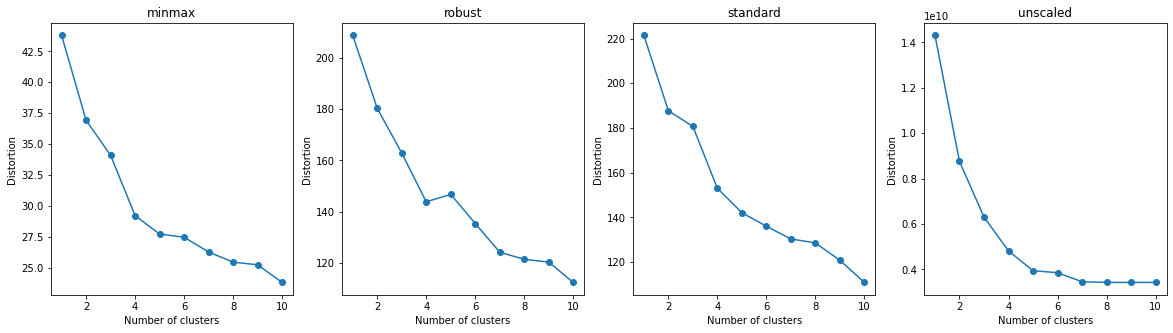

In [40]:
df = df.copy()
cols = ['multi_pop','9인이하_사업체수','일평균 승하차인구수']
cols_ = ['multi_pop','9인이하_사업체수','일평균 승하차인구수']
scaler = ['minmax', 'robust', 'standard', 'unscaled']
box = {}

for m in scaler:
    if m == 'unscaled':
        box[m] = df.loc[:,cols]
    else:
        box[m] = df_scaler(df, cols_, scale = m)


n = len(box)
fig, axes = plt.subplots(1,n,figsize = (5 * n, 5))
for i in range(len(scaler)):
    distortions = []
    for j in range(1, 11):
        km = KMedoids(n_clusters=j)
        km.fit(box[scaler[i]].loc[:,cols])
        distortions.append(km.inertia_) # 군집 내 분산, 적을수록 좋음
    
    axes[i].plot(range(1, 11), distortions, marker='o')
    axes[i].set_title(scaler[i])
    axes[i].set_xlabel('Number of clusters')
    axes[i].set_ylabel('Distortion')
plt.show()

C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54616 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50629 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-

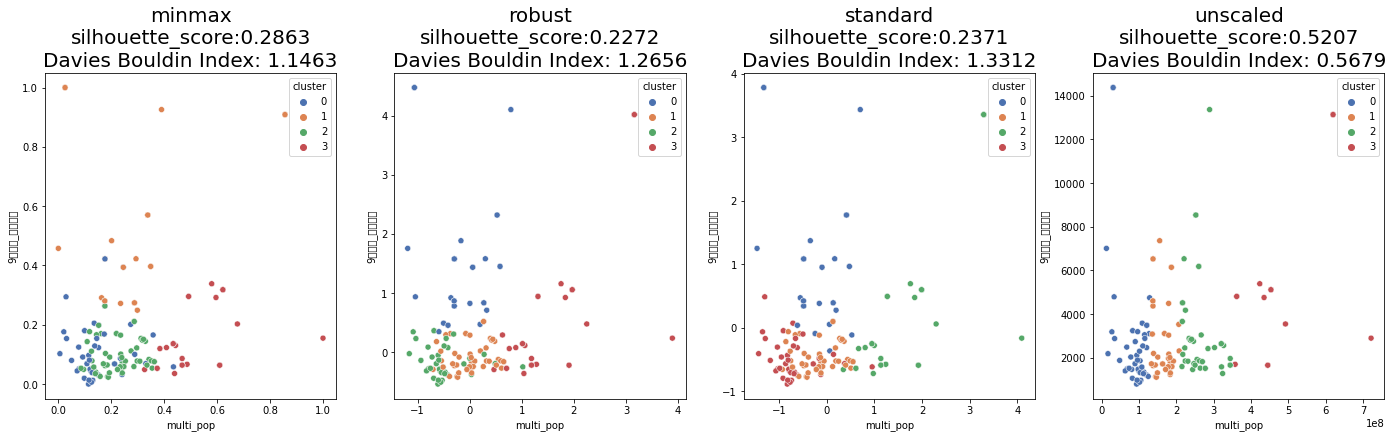

In [41]:
n = len(box)
fig, axes = plt.subplots(1,n,figsize = (6 * n, 6))
for i in range(len(scaler)):
    
    kmedoids = KMedoids(n_clusters=4)
    kmedoids.fit(box[scaler[i]].loc[:,cols])
    box[scaler[i]]['cluster'] = kmedoids.labels_
    
    s = sns.scatterplot(x = cols[0], y = cols[1], data = box[scaler[i]], marker='o', hue = 'cluster', palette = 'deep', ax = axes[i])
    s.set_title(f"{scaler[i]}\nsilhouette_score:{round(silhouette_score(box[scaler[i]].loc[:,cols], kmedoids.labels_),4)}\nDavies Bouldin Index: {round(davies_bouldin_score(box[scaler[i]].loc[:,cols],kmedoids.labels_),4)}", fontsize = 20)


plt.show()

# DBSCAN

0.04013998092668685
0.2923760621564462
0.49022260789859295
101924688.08574034


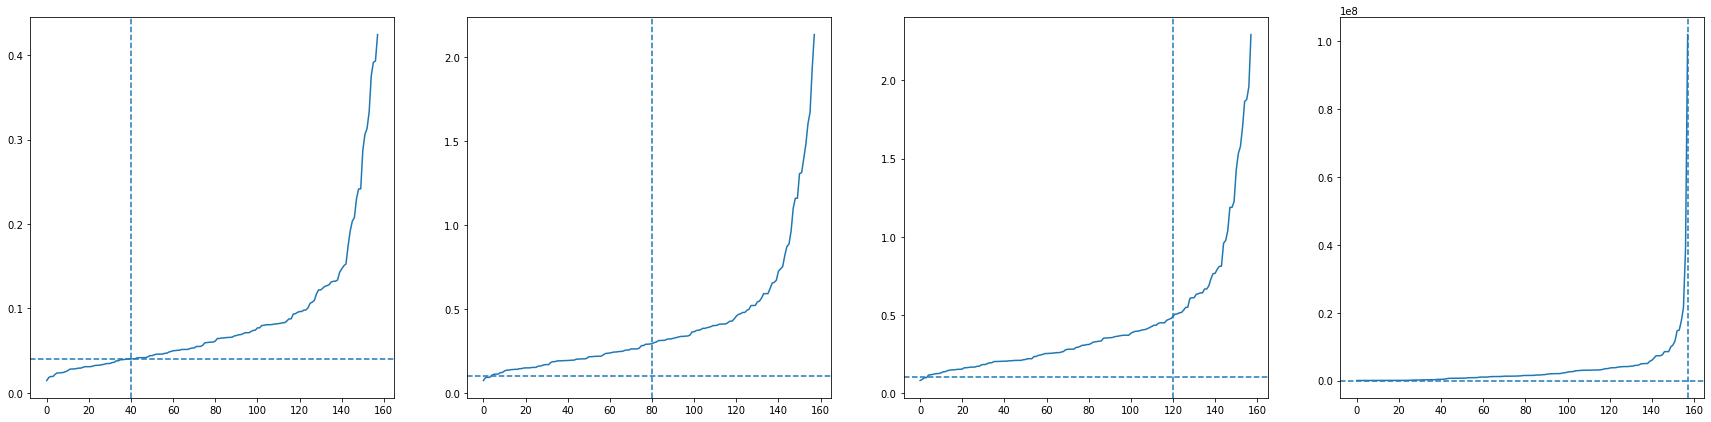

In [42]:
df = df.copy()
cols = ["multi_pop","9인이하_사업체수","일평균 승하차인구수"]
cols_ = ["multi_pop","9인이하_사업체수","일평균 승하차인구수"]
scaler = ['minmax', 'robust', 'standard', 'unscaled']
box = {}
for m in scaler:
    if m == 'unscaled':
        box[m] = df.loc[:,cols]
    else:
        box[m] = df_scaler(df, cols_, scale = m)

n=len(box)
fig, axes = plt.subplots(nrows= 1, ncols=4, figsize=(30, 7))

xaxis = [0.04, 0.1, 0.1, 8]
yxis = [40, 80, 120, 157]
par = []
for i in range(len(scaler)):
    eigh = NearestNeighbors(n_neighbors=4)
    eigh.fit(box[scaler[i]].loc[:,cols])
    distances, indices = eigh.kneighbors(box[scaler[i]].loc[:,cols])
    
    axes[i].plot(np.sort(distances[:, 2]))
    axes[i].axvline(yxis[i], 0, 2, ls='--')
    axes[i].axhline(xaxis[i], 0, yxis[i], ls='--')
    print(np.sort(distances[:, 2])[yxis[i]])
    par.append(np.sort(distances[:, 2])[yxis[i]])
        
plt.show()

C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54616 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50629 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-

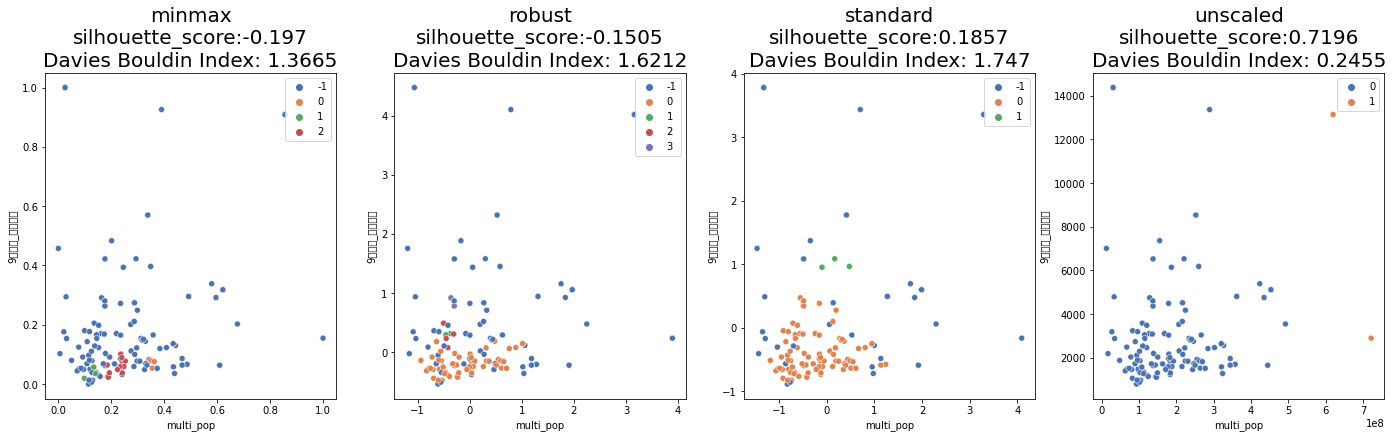

In [43]:
n = len(box)
fig, axes = plt.subplots(1,n,figsize = (6 * n, 6))

for i in range(len(scaler)):
    
    dbscan = DBSCAN(eps=par[i], min_samples=4) # 위에서 구한 eps와 minpts로 scaling된 데이터 DBSCAN 학습
    dbscan.fit(box[scaler[i]].loc[:,cols])
    
    s=sns.scatterplot(x= cols[0], y=cols[1], data= box[scaler[i]], hue=dbscan.labels_, palette='deep', ax = axes[i], marker='o')
    s.set_title(f"{scaler[i]}\nsilhouette_score:{round(silhouette_score(box[scaler[i]].loc[:,cols], dbscan.labels_),4)}\nDavies Bouldin Index: {round(davies_bouldin_score(box[scaler[i]].loc[:,cols],dbscan.labels_),4)}", fontsize = 20)

plt.show()

# Hierarchical Clustering

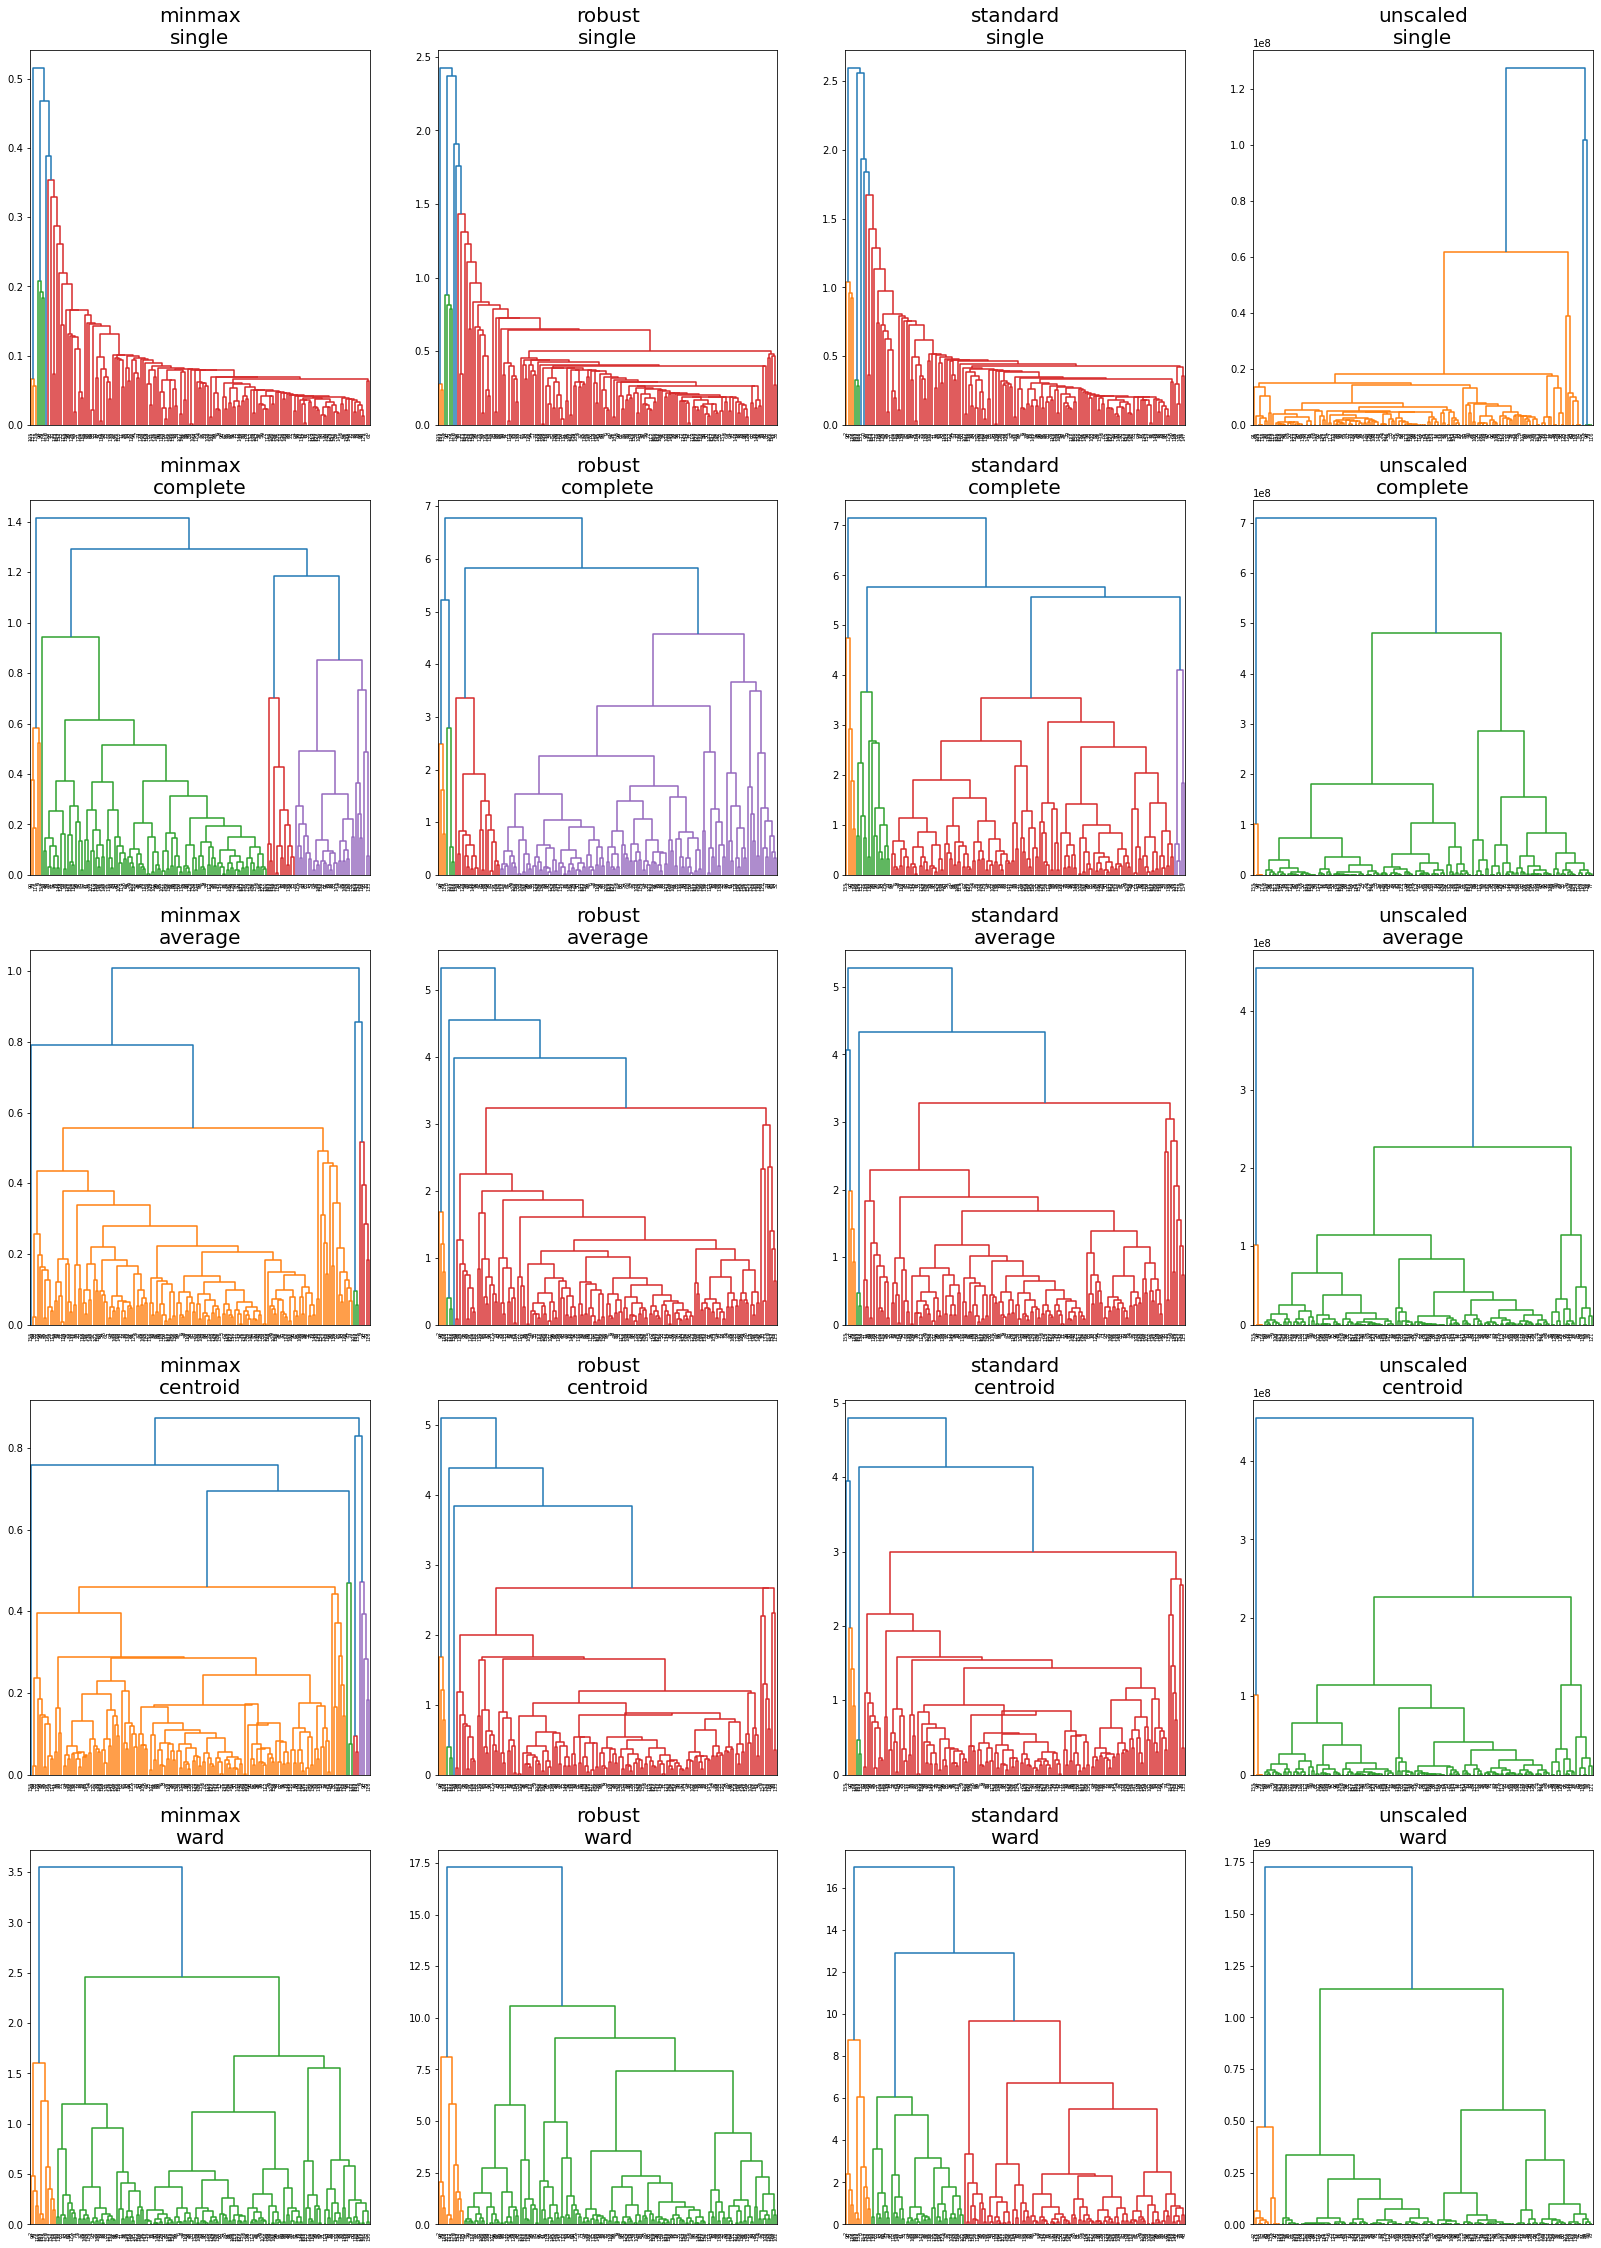

In [44]:
df = df.copy()
cols = ["multi_pop","9인이하_사업체수","일평균 승하차인구수"]
cols_ = ["multi_pop","9인이하_사업체수","일평균 승하차인구수"]
scaler = ['minmax', 'robust', 'standard', 'unscaled']
box = {}
for m in scaler:
    if m == 'unscaled':
        box[m] = df.loc[:,cols]
    else:
        box[m] = df_scaler(df, cols_, scale = m)

n=len(box)

linkage_list = ['single', 'complete', 'average', 'centroid', 'ward']

fig, axes = plt.subplots(nrows=len(linkage_list), ncols=n, figsize=(28, 40))
for i in range(len(linkage_list)):
    for j in range(len(scaler)):
        hierarchical_single = linkage(box[scaler[j]].loc[:,cols], method=linkage_list[i])
        dn = dendrogram(hierarchical_single, ax=axes[i][j])
        axes[i][j].set_title(f"{scaler[j]}\n{linkage_list[i]}", fontsize = 20)
        
        
plt.show()

C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54616 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50629 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-

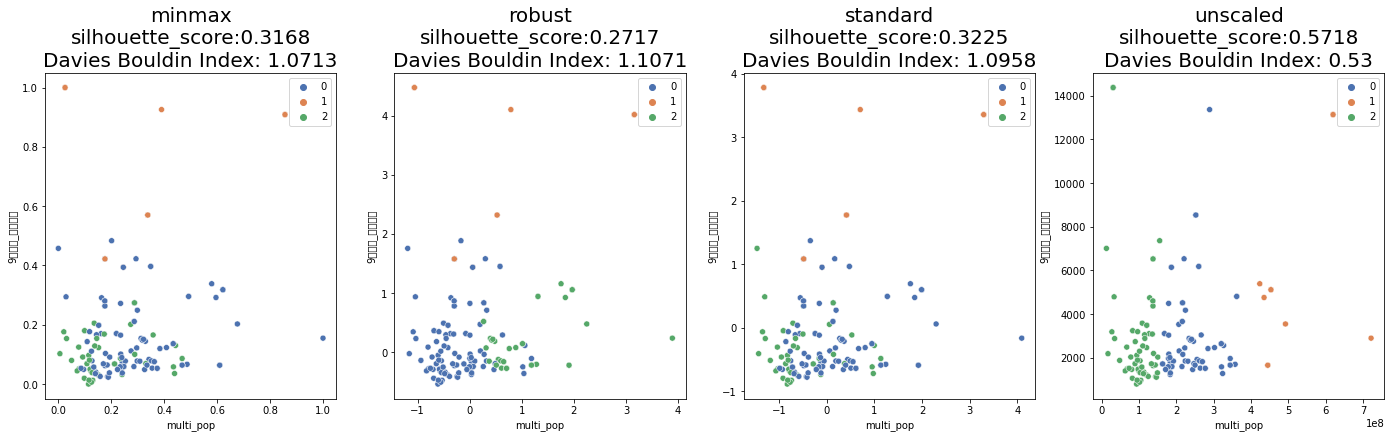

In [45]:
# Scatter Plot으로 군집화 시각화 확인
n = len(box)
fig, axes = plt.subplots(1,n,figsize = (6 * n, 6))

for i in range(len(scaler)):
    
    agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
    labels = agg_clustering.fit_predict(box[scaler[i]].loc[:,cols])
    
    s=sns.scatterplot(x= cols[0], y=cols[1], data= box[scaler[i]], hue=labels, palette='deep', ax = axes[i], marker='o')
    s.set_title(f"{scaler[i]}\nsilhouette_score:{round(silhouette_score(box[scaler[i]].loc[:,cols], labels),4)}\nDavies Bouldin Index: {round(davies_bouldin_score(box[scaler[i]].loc[:,cols],labels),4)}", fontsize = 20)

plt.show()